# Imports Libraries and Tools

In [1]:
import os
import numpy as np
import random
from PIL import Image, ImageEnhance
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:

!kaggle datasets download masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 98% 146M/149M [00:01<00:00, 143MB/s]
100% 149M/149M [00:01<00:00, 148MB/s]


In [3]:
path_to_zip_file = '/content/brain-tumor-mri-dataset.zip'
directory_to_extract_to = "./"
import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
  zip_ref.extractall(directory_to_extract_to)

In [ ]:
import os
import shutil


dataset_dir = "/content/Training"


yes_folder = os.path.join(dataset_dir, "yes")


os.makedirs(yes_folder, exist_ok=True)

target_folders = ["glioma", "meningioma", "pituitary"]


total_moved = 0


for folder in target_folders:
    folder_path = os.path.join(dataset_dir, folder)

    if os.path.exists(folder_path):  
   
        for root, dirs, files in os.walk(folder_path):
            for img in files:
                
                if not img.startswith('.'):
                    img_path = os.path.join(root, img)

                    
                    dest_path = os.path.join(yes_folder, f"{folder}_{img}")

                    try:
                        shutil.copy2(img_path, dest_path)  # Copy instead of move
                        total_moved += 1
                    except Exception as e:
                        print(f"Error moving {img_path}: {e}")

        
        try:
            shutil.rmtree(folder_path)
            print(f"Deleted folder: {folder_path}")
        except Exception as e:
            print(f"Error deleting folder {folder_path}: {e}")

print(f"Total images moved: {total_moved}")
print("Image moving process completed!")

Deleted folder: /content/Training/glioma
Deleted folder: /content/Training/meningioma
Deleted folder: /content/Training/pituitary
Total images moved: 4117
Image moving process completed!


# Load Datasets

In [8]:
import os
from sklearn.utils import shuffle

# Set local directories for training and testing data
train_dir ="/content/Training"

test_dir = "/content/Testing"


# Load and shuffle the train data
train_paths = []
train_labels = []
for label in os.listdir(train_dir):
    label_path = os.path.join(train_dir, label)
    if os.path.isdir(label_path):  # Ensure it's a directory
        for image in os.listdir(label_path):
            train_paths.append(os.path.join(label_path, image))
            train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

# Load and shuffle the test data
test_paths = []
test_labels = []
for label in os.listdir(test_dir):
    label_path = os.path.join(test_dir, label)
    if os.path.isdir(label_path):  # Ensure it's a directory
        for image in os.listdir(label_path):
            test_paths.append(os.path.join(label_path, image))
            test_labels.append(label)


test_paths, test_labels = shuffle(test_paths, test_labels)

# Print some results to verify
print(f"Loaded {len(train_paths)} training images and {len(test_paths)} testing images.")


Loaded 5712 training images and 1311 testing images.


# Data Visualization

Total number of train_paths: 5712
First few paths: ['/content/Training/yes/pituitary_Tr-pi_0421.jpg', '/content/Training/yes/glioma_Tr-gl_1203.jpg', '/content/Training/yes/pituitary_Tr-pi_1451.jpg', '/content/Training/no/Tr-no_1168.jpg', '/content/Training/yes/meningioma_Tr-me_0537.jpg']
First few labels: ['yes', 'yes', 'yes', 'no', 'yes']


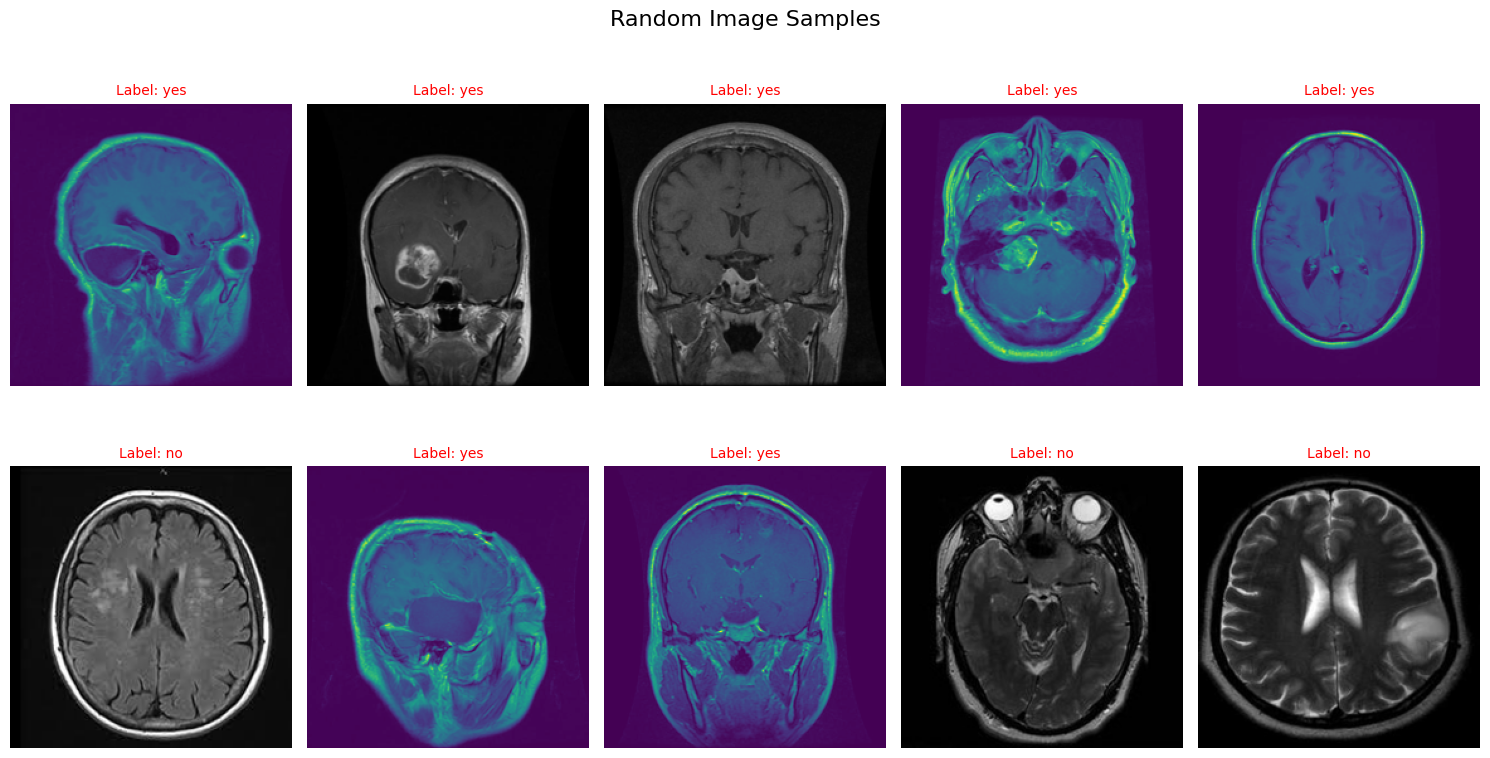

In [ ]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

def visualize_random_images(train_paths, train_labels, num_images=10, figsize=(15, 8)):
   
    # Validate inputs
    if not train_paths or not train_labels:
        print("Error: Empty train_paths or train_labels list!")
        return

    if len(train_paths) != len(train_labels):
        print("Error: Mismatch between train_paths and train_labels lengths!")
        return

    # Check file existence and print out paths
    valid_paths = []
    valid_labels = []
    for path, label in zip(train_paths, train_labels):
        if os.path.exists(path):
            valid_paths.append(path)
            valid_labels.append(label)
        else:
            print(f"Warning: File not found - {path}")

    if not valid_paths:
        print("No valid image paths found!")
        return

    
    num_images = min(num_images, len(valid_paths))

    
    random_indices = random.sample(range(len(valid_paths)), num_images)

    
    rows = int(np.ceil(num_images / 5))
    cols = min(num_images, 5)

    plt.figure(figsize=figsize)

    for i, idx in enumerate(random_indices):
        plt.subplot(rows, cols, i+1)

        # Load image
        img_path = valid_paths[idx]
        try:
            img = Image.open(img_path)

           
            img = img.resize((224, 224))

            
            img_array = np.array(img)

            
            plt.imshow(img_array)
            plt.axis('off')  

        
            label = valid_labels[idx]
            plt.title(f"Label: {label}", fontsize=10, color='red')

        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

    
    plt.tight_layout()
    plt.suptitle('Random Image Samples', fontsize=16, y=1.02)
    plt.show()


print("Total number of train_paths:", len(train_paths))
print("First few paths:", train_paths[:5])
print("First few labels:", train_labels[:5])


visualize_random_images(train_paths, train_labels)

# Image Preprocessing (Helper Functions)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rescale=1./255,  
    rotation_range=20, 
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    zoom_range=0.2,  
    horizontal_flip=True,  
    fill_mode='nearest'  
)

val_datagen = ImageDataGenerator(
    rescale=1./255 
)

# Train Data Generator
train_ds = datagen.flow_from_directory(
    '/content/Training',
    target_size=(250, 250),  
    batch_size=32,  
    class_mode='binary',  
    shuffle=True,  
    seed=42  
)

# Validation Data Generator
validation_ds = val_datagen.flow_from_directory(
    '/content/Testing',
    target_size=(250, 250),  
    batch_size=32,  
    class_mode='binary',  
    shuffle=False  
)

# Print class information
print("Train Classes:", train_ds.class_indices)
print("Validation Classes:", validation_ds.class_indices)
print("Number of Training Samples:", train_ds.samples)
print("Number of Validation Samples:", validation_ds.samples)

Found 5712 images belonging to 2 classes.
Found 1311 images belonging to 2 classes.
Train Classes: {'no': 0, 'yes': 1}
Validation Classes: {'no': 0, 'yes': 1}
Number of Training Samples: 5712
Number of Validation Samples: 1311


In [ ]:
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        print(f"Class '{class_name}' has {len(os.listdir(class_path))} images")


Class 'no' has 1595 images
Class 'yes' has 4117 images


In [20]:
!rm -r /content/Testing/.ipynb_checkpoints


# MODEL:

In [22]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image, ImageEnhance
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


In [23]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [24]:
# covolution base from vgg16 for feature extraction
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(250, 250, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
conv_base.trainable = False
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 250, 250, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 250, 250, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 250, 250, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 125, 125, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 125, 125, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 125, 125, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 62, 62, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 62, 62, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 62, 62, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 31, 31, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 31, 31, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 31, 31, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 31, 31, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [26]:
# for fine tuning
conv_base.trainable = True
for layer in conv_base.layers[-4:]:
    layer.trainable = True

In [27]:
# model
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,138,753 (80.64 MB)

 Trainable params: 21,138,241 (80.64 MB)

 Non-trainable params: 512 (2.00 KB)

In [28]:
# adam = Adam(learning_rate=1e-5)
rmsprop = RMSprop(learning_rate=1e-5)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])


In [29]:
history = model.fit(train_ds, epochs=5, validation_data=validation_ds)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 221s 998ms/step - accuracy: 0.8831 - loss: 0.2942 - val_accuracy: 0.9519 - val_loss: 0.1504
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 125s 697ms/step - accuracy: 0.9644 - loss: 0.1272 - val_accuracy: 0.9603 - val_loss: 0.1794
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 125s 699ms/step - accuracy: 0.9738 - loss: 0.0944 - val_accuracy: 0.9672 - val_loss: 0.1112
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 142s 696ms/step - accuracy: 0.9786 - loss: 0.0757 - val_accuracy: 0.9733 - val_loss: 0.0836
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 125s 698ms/step - accuracy: 0.9763 - loss: 0.0767 - val_accuracy: 0.9802 - val_loss: 0.0706


# Train and Val Plots

Available keys in history: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


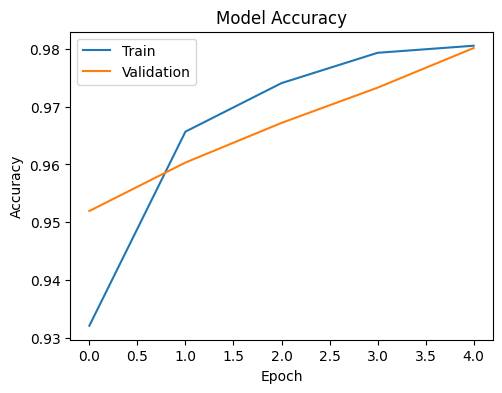

In [30]:
# Plotting training and validation metrics
import matplotlib.pyplot as plt


print("Available keys in history:", history.history.keys())


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

accuracy_key = 'accuracy' if 'accuracy' in history.history else 'sparse_categorical_accuracy'
val_accuracy_key = 'val_accuracy' if 'val_accuracy' in history.history else 'val_sparse_categorical_accuracy'

plt.plot(history.history[accuracy_key])
plt.plot(history.history[val_accuracy_key])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


plt.show()

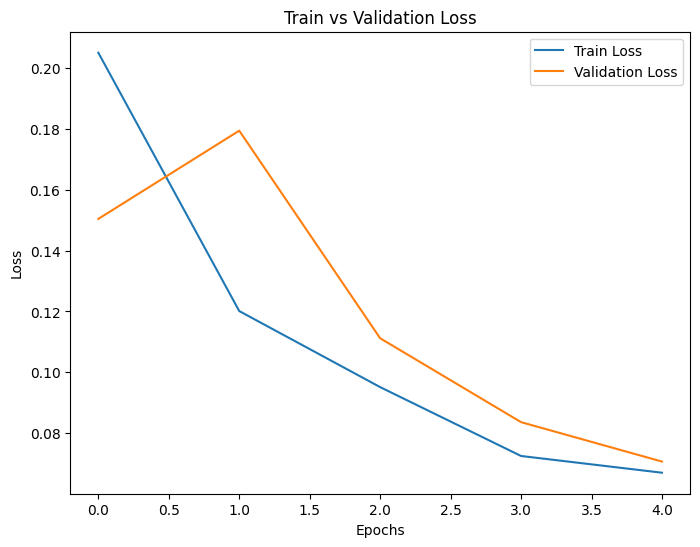

In [31]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')
plt.show()


# Model Classification Report

In [32]:
model.evaluate(validation_ds)

41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 222ms/step - accuracy: 0.9384 - loss: 0.2046


[0.07062780857086182, 0.980167806148529]

# Model Confusion Plot

In [33]:
# Generate Classification Report
from sklearn.metrics import classification_report
import numpy as np


def get_predictions_and_labels(model, data_generator):

    data_generator.reset()


    true_labels = []
    for i in range(len(data_generator)):
        batch = data_generator[i]
        y_batch = batch[1]

        if data_generator.class_mode == 'binary':
            y_batch = y_batch.astype(int)

        true_labels.extend(y_batch)


    predictions = model.predict(data_generator, verbose=1)

    if len(predictions.shape) > 1 and predictions.shape[1] > 1:  # Multi-class case
        predicted_labels = np.argmax(predictions, axis=1)
    else:
        predicted_labels = (predictions > 0.5).astype(int).reshape(-1)

    return predicted_labels, np.array(true_labels)


pred_labels, true_labels = get_predictions_and_labels(model, validation_ds)


class_names = list(validation_ds.class_indices.keys())


print("Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=class_names))

41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 237ms/step
Classification Report:
              precision    recall  f1-score   support

          no       1.00      0.94      0.97       405
         yes       0.97      1.00      0.99       906

    accuracy                           0.98      1311
   macro avg       0.99      0.97      0.98      1311
weighted avg       0.98      0.98      0.98      1311



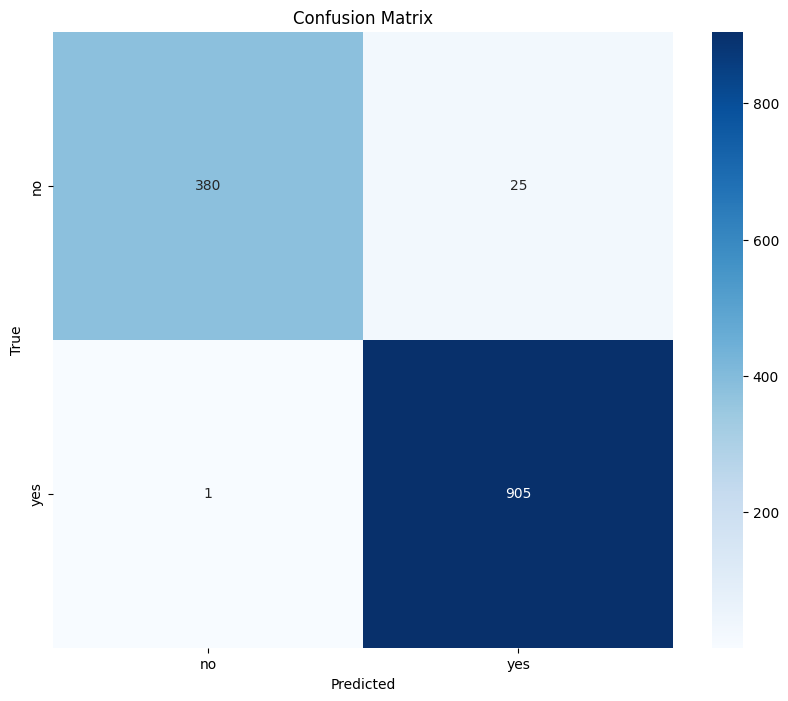

In [34]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Roc Curve Plot


41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 225ms/step


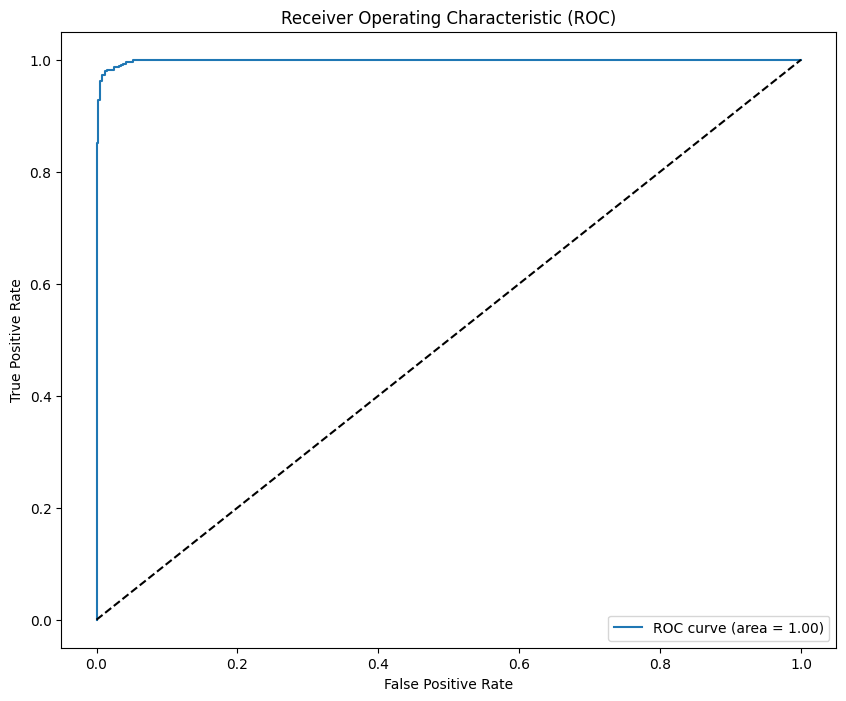

In [35]:
# Generate ROC curve and AUC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


validation_ds.reset()
y_pred_proba = model.predict(validation_ds, verbose=1)
y_test = true_labels

plt.figure(figsize=(10, 8))


if len(class_names) == 2:  # Binary classification
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")

else:  # Multi-class classification
    from sklearn.preprocessing import label_binarize


    y_test_bin = label_binarize(y_test, classes=range(len(class_names)))


    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'Class {class_names[i]} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC')
    plt.legend(loc="lower right")

plt.show()

# Save & Load Model

In [37]:
# Save the model
import datetime


timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
model_save_path = f'brain_tumor_model_{timestamp}.h5'

# Save the model
model.save(model_save_path)
print(f"Model saved to {model_save_path}")


from tensorflow.keras.models import load_model


loaded_model = load_model(model_save_path)
print("Model loaded successfully!")

# Test the loaded model with a sample prediction
validation_ds.reset()
sample_batch = next(iter(validation_ds))
sample_images, sample_labels = sample_batch

# Make predictions
sample_predictions = loaded_model.predict(sample_images)
if len(class_names) > 2:  # Multi-class
    sample_pred_classes = np.argmax(sample_predictions, axis=1)
else:  # Binary
    sample_pred_classes = (sample_predictions > 0.5).astype(int).reshape(-1)

# Display some sample predictions
for i in range(min(5, len(sample_labels))):
    true_class = class_names[int(sample_labels[i])]
    pred_class = class_names[int(sample_pred_classes[i])]
    print(f"Sample {i+1}: True class: {true_class}, Predicted class: {pred_class}")

Model saved to brain_tumor_model_20250304-130422.h5


Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step
Sample 1: True class: no, Predicted class: yes
Sample 2: True class: no, Predicted class: no
Sample 3: True class: no, Predicted class: no
Sample 4: True class: no, Predicted class: no
Sample 5: True class: no, Predicted class: no
